## Практическое построение классификации

### Как подготовить данные для классификации?

In [4]:
from icecream import ic
from sklearn.datasets import make_classification
import numpy as np
X, Y = make_classification( n_features=2,n_informative=2, n_redundant=0, n_classes=2)

ic(np.unique(Y))


ic| np.unique(Y): array([0, 1])


array([0, 1])

In [28]:
X.shape, Y.shape

((100, 2), (100,))

Обратите внимание, что в данном случае мы явно указываем, какие признаки будут расположены по осям. В данном примере мы откладываем первый столбец (с индексом 0) по горизонтальной оси, а второй (с индексом 1) - по вертикальной. Вот так это выглядит на графике:

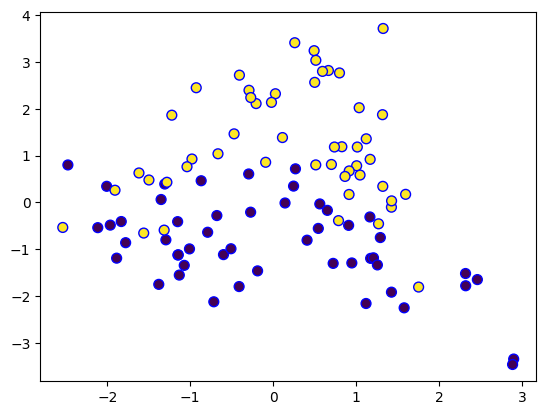

In [27]:
import   matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=50, edgecolor="b")
plt.show()

Есть другой способ - визуализировать каждый класс отдельно. В таком случае мы можем более гибко управлять отображением разных классов - задавать явно произвольные цвета, размеры, форму маркеров точек. Обратите внимание, как в данном примере используется условная индексация одного массива (признаков) другим массивом (целевой переменной):

In [31]:
type(Y)

numpy.ndarray

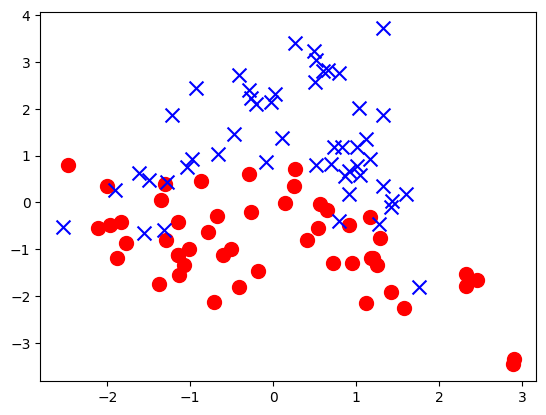

In [29]:
plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], marker="x", c='b', s=100)
plt.show()

## Как реализовать логистическую регрессию?

Рассмотрим простейшую модель логистической регрессии. Как мы увидели в этой главе, она мало чем отличается от модели линейной регрессии, поэтому возьмем за основу класс, который реализовали в предыдущей части, посвященной задаче регрессии.
Мы будем рассматривать двумерную задачу классификации. То есть у нас будет два непрерывных признака -  x1  x2
Поэтому в модели будет 3 параметра - b0 b1 b2 
Еще мы предполагаем решение бинарной задачи, так как множественная классификация решается отдельным алгоритмом “один-против-всех”
Ключевым отличием метода predict будет то, что мы считаем линейную комбинацию, а затем считаем логистическую функцию от нее:

In [37]:
import numpy as np
def predict(self, x):
    x1, x2 = x
    z = self.b0 + self.b1 * x1 + self.b2 * x2
    return 1 / (1 + np.exp(-z))

Модифицируем функцию ошибки так, чтобы она соответствовала формуле логарифмической ошибки для логистической регрессии:

In [72]:
def error(self, X, Y):     
    return -sum(Y * np.log2(self.predict(X)) + (1 - Y) *(1 - np.log2(self.predict(X)))) / len(X[0])
    # почему тут минус ? - потому что в скобках минуса нет, а логарифмы именно отрицательные должны быть 

Теперь перейдем к методу градиентного спуска. И вот здесь все останется поразительно похожим на линейную регрессию, за исключением большего количества параметров:

In [73]:
def BGD(self, X, Y):  
    alpha = 0.5
    for _ in range(1000):
      dJ0 = sum(self.predict(X) - Y) /len(X)              # dJ/db0
      dJ1 = sum((self.predict(X) - Y) * X[0]) /len(X[0])  # dJ/db1
      dJ2 = sum((self.predict(X) - Y) * X[1]) /len(X[0])  # dJ/db2
      self.b0 -= alpha * dJ0
      self.b1 -= alpha * dJ1
      self.b2 -= alpha * dJ2

Полностью код, реализующий метод логистической регрессии, выглядит так:



In [38]:
class hypothesis(object):
    """Модель логистической регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.b2 = 1
    def predict(self, x):
        x1, x2 = x
        z = self.b0 + self.b1 * x1 + self.b2 * x2
        return 1 / (1 + np.exp(-z))
    def error(self, X, Y):
        return -sum(Y * np.log2(self.predict(X)) + (1 - Y) *(1 - np.log2(self.predict(X)))) / len(X[0])
    def BGD(self, X, Y):  
        alpha = 0.5
        for _ in range(1000):
          dJ0 = sum(self.predict(X) - Y) /len(X)
          dJ1 = sum((self.predict(X) - Y) * X[0]) /len(X[0])
          dJ2 = sum((self.predict(X) - Y) * X[1]) /len(X[0])
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1
          self.b2 -= alpha * dJ2

Обратите внимание на задание начальных значений параметров. В данном примере мы создаем регрессию со следующими значениями параметров по умолчанию: 
b0=0;b1=0;b2=1. Задание одного из параметров в 1 нужно будет потом, чтобы получился более понятный график модели без обучения. На практике можно задавать начальные значения всеми нулями.

### Как оценить качество классификационной модели?Permalink

После создания модели логистической регрессии логичным шагом будет вывести ее на график вместе с точками данных. Проблема в том, что это не так просто, как в случае с линейной регрессией, так как мы имеем два измерения признаков плюс еще значение самой функции модели. Для того, чтобы наглядно увидеть, как сочетается значение модели с точками воспользуемся построением контурного графика.

Для начала создадим экземпляр модели с параметрами по умолчанию:

In [40]:
X.shape,X.T.shape

((100, 2), (2, 100))

In [34]:
Y.shape

(100,)

In [39]:
hyp = hypothesis()
hyp.predict(X.T)
J = hyp.error(X.T, Y)
print("initial error:", J)

initial error: -1.177538264606019


Теперь надо подготовить равномерные данные для рисования функции гипотезы. Нам понадобится создать двумерную сетку. К счастью, в numpy есть необходимые элементы. Подробный разбор кода выходит за рамки данного пособия, так как использует продвинутые возможности библиотеки numpy. Если вам интересно, как работает этот код, обратитесь к документации к используемым методам:

In [49]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[0]-1, X.max(axis=0)[0]+1, 0.01), 
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

XX.shape,  xx.shape

((682992, 2), (918, 744))

In [44]:
Z = hyp.predict(XX.T)
Z = Z.reshape(xx.shape)

Данный код выполнит предсказание модели в каждой точке нашей сетки. Эти данные мы сможем использовать для того, чтобы построить контурный график вот так:

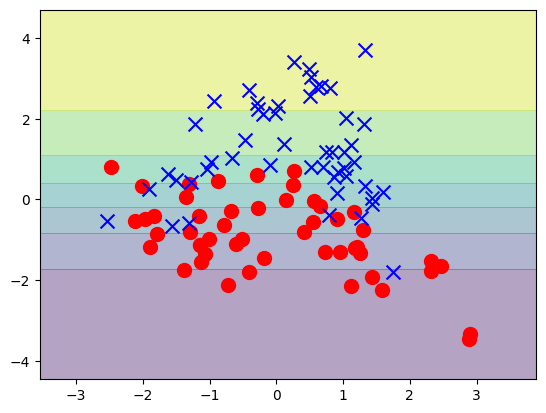

In [45]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0][Y==0], X[:, 1][Y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][Y==1], X[:, 1][Y==1], marker="x", c='b', s=100)

In [ ]:
def BGD(self, X, Y):  
        alpha = 0.5
        for _ in range(1000):
          dJ0 = sum(self.predict(X) - Y) /len(X)
          dJ1 = sum((self.predict(X) - Y) * X[0]) /len(X[0])
          dJ2 = sum((self.predict(X) - Y) * X[1]) /len(X[0])
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1
          self.b2 -= alpha * dJ2

На графике мы видим наши точки данных, они выглядят так же, как и в предыдущих частях. Кроме него график заполняет заливка цветом. Цвет показывает значение функции гипотезы в данной точке. Так как мы задавали начальные значения параметров модели специально, параметр 
b2=1 дает нам такой ровный градиент, который увеличивается равномерно с ростом значения признака x1
Конечно, такой градиент никак не учитывает положение точек. Это и логично, ведь наша модель еще не обучена. Давайте запустим градиентный спуск и увидим модель после обучения:

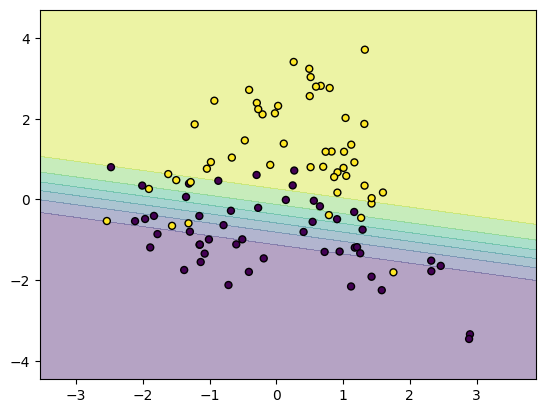

In [46]:
hyp.BGD(X.T, Y)

Z = hyp.predict((xx, yy))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")
plt.show()

In [47]:
hyp.b0,hyp.b1,hyp.b2

(1.4446308791444666, 0.6418545982789592, 2.825809285914339)

Обратите внимание, что мы переиспользуем сетку, которую создавали на предыдущем шаге. Ведь сами значения не меняются, меняется только набор значений модели. После обучения вы должны увидеть примерно такой график: